In [1]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib
import music21 as mu
import pymongo
from pymongo import MongoClient
from bs4 import BeautifulSoup

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/Users/jamiegabriel/Desktop/phd_code'

In [3]:
soup = BeautifulSoup(open('FinalDataSet/XMLFiles/JazzSolos/KJAllTheThingsYouAre1983_2143_290.xml'))

/Library/Python/2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


In [70]:
notesDataFrame = pd.DataFrame
notes = soup.find_all('note')

In [85]:
theList = []
for note in notes:
    #print note
    theDict = {}
    theDict['restFlag'] = note.rest
    #theDict['durationModified'] = note.tuplet
    theDict['noteName'] = note.step
    theDict['accidental'] = note.alter
    theDict['noteType'] = note.type
    theDict['octave'] = note.octave
    theDict['part'] = note.instrument
    theDict['duration'] = note.duration
    print note.tie
    theList.append(theDict)
    

None
None
None
None
None
None
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
<tie type="start"></tie>
<tie type="stop"></tie>
<tie type="start"></tie>
<tie type="stop"></tie>
None
None
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
None
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
None
None
None
None
None
None
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
<tie type="stop"></tie>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
<tie type="start"></tie>
<tie type="stop"></tie>
None
None
None
None
None
None
<tie type="start"></tie>
<tie type="stop"></tie>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

In [72]:
df = pd.DataFrame(theList)

In [73]:
import re
mystring = 'frank'

re.sub('<[^>]*>', '', mystring)

'frank'

In [74]:
df.head()

,accidental,duration,noteName,noteType,octave,part,restFlag
0,None,<duration>256</duration>,None,<type>quarter</type>,None,"<instrument id=""P1-I1""></instrument>",<rest></rest>
1,<alter>-1</alter>,<duration>256</duration>,<step>B</step>,<type>quarter</type>,<octave>4</octave>,"<instrument id=""P1-I1""></instrument>",None
2,<alter>-1</alter>,<duration>512</duration>,<step>A</step>,<type>half</type>,<octave>4</octave>,"<instrument id=""P1-I1""></instrument>",None
3,None,<duration>384</duration>,<step>C</step>,<type>quarter</type>,<octave>5</octave>,"<instrument id=""P1-I1""></instrument>",None
4,None,<duration>128</duration>,<step>G</step>,<type>eighth</type>,<octave>4</octave>,"<instrument id=""P1-I1""></instrument>",None


In [75]:
#first clean
def cleanAccidental(data_row):
    accidentalString = str(data_row['accidental'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['accidental'] = df.apply(cleanAccidental, axis=1) 

def cleanDuration(data_row):
    accidentalString = str(data_row['duration'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['duration'] = df.apply(cleanDuration, axis=1) 

def cleanNoteName(data_row):
    accidentalString = str(data_row['noteName'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test)
    
df['noteName'] = df.apply(cleanNoteName, axis=1) 

def cleanNoteType(data_row):
    accidentalString = str(data_row['noteType'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['noteType'] = df.apply(cleanNoteType, axis=1) 

def cleanOctave(data_row):
    accidentalString = str(data_row['octave'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['octave'] = df.apply(cleanOctave, axis=1) 
        
def cleanRest(data_row):
    restVal = -1
    restAsString = str(data_row['restFlag'])
    if data_row['restFlag'] is not None:
        restVal ='rest'
    else:
        restVal = 'note'

    return str(restVal)
    
df['restFlag'] = df.apply(cleanRest, axis=1)



In [76]:
#second clean
def cleanPart(data_row):
    accidentalString = str(data_row['part'])
    test = accidentalString[16:18]
    return str(test) 

df['part'] = df.apply(cleanPart, axis=1)

def convertDurationAsPerQuarterNoteIsOneBeat(data_row):
    asFloat = float(data_row['duration'])
    return asFloat / 256

df['quarterNoteDuration'] = df.apply(convertDurationAsPerQuarterNoteIsOneBeat, axis=1)

In [77]:
partOne = df[df['part'] == 'P1']
partTwo = df[df['part'] == 'P2']

In [78]:
partOne['noteEventLocation'] = partOne['quarterNoteDuration'].cumsum()
partTwo['noteEventLocation'] = partTwo['quarterNoteDuration'].cumsum()
partOne['noteEventStartingLocation'] = partOne['noteEventLocation'].shift()
partTwo['noteEventStartingLocation'] = partTwo['noteEventLocation'].shift()

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the doc

In [79]:
df2 = partOne.append(partTwo)

In [80]:
df2 = df2.sort('noteEventLocation')
df2 = df2.reset_index()

In [81]:
df2.head()

,index,accidental,duration,noteName,noteType,octave,part,restFlag,quarterNoteDuration,noteEventLocation,noteEventStartingLocation
0,0,None,256,None,quarter,None,P1,rest,1.0,1.0,NaN
1,1,-1,256,B,quarter,4,P1,note,1.0,2.0,1
2,2058,None,1024,G,whole,3,P2,note,4.0,4.0,NaN
3,2,-1,512,A,half,4,P1,note,2.0,4.0,2
4,3,None,384,C,quarter,5,P1,note,1.5,5.5,4


In [82]:
offsetForC = 0
offsetForD = 2
offsetForE = 4
offsetForF = 5
offsetForG = 7
offsetForA = 9
offsetForB = 11

def midiNumberAssign(data_row):
    
    def adjustForAccidental(accidentalVal):
        if accidentalVal == 'None':
            return 0
        else:
            return int(accidentalVal)

    if data_row['octave'] != "None":
        baseVal = int(data_row['octave']) * 12
        if data_row['noteName'] == 'C':
            return baseVal + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'D':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'E':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'F':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'G':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'A':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'B':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])



df2['midiNumber'] = df2.apply(midiNumberAssign, axis=1)

In [83]:
df2.head()

,index,accidental,duration,noteName,noteType,octave,part,restFlag,quarterNoteDuration,noteEventLocation,noteEventStartingLocation,midiNumber
0,0,None,256,None,quarter,None,P1,rest,1.0,1.0,NaN,NaN
1,1,-1,256,B,quarter,4,P1,note,1.0,2.0,1,49
2,2058,None,1024,G,whole,3,P2,note,4.0,4.0,NaN,38
3,2,-1,512,A,half,4,P1,note,2.0,4.0,2,49
4,3,None,384,C,quarter,5,P1,note,1.5,5.5,4,60


In [88]:
del df2['index']
del df2['accidental']
del df2['duration']
del df2['noteType']
del df2['octave']
del df2['noteEventLocation']

In [89]:
df2.head()

,noteName,part,restFlag,quarterNoteDuration,noteEventStartingLocation,midiNumber
0,None,P1,rest,1.0,NaN,NaN
1,B,P1,note,1.0,1,49
2,G,P2,note,4.0,NaN,38
3,A,P1,note,2.0,2,49
4,C,P1,note,1.5,4,60


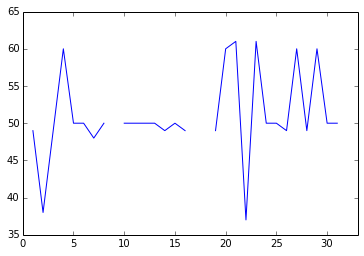

In [92]:
df2['midiNumber'][0:34].plot()

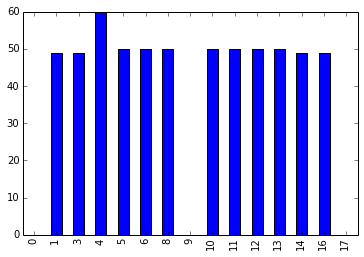

In [99]:
df2[df2['part'] == 'P1'][0:15]['midiNumber'].plot(kind='bar')

In [84]:
client = MongoClient()

In [10]:
db = client['music-search-data']

In [11]:
corpusV2 = db.corpusV2

In [12]:
db.corpusV2.find({'currentMeasure':287})

In [13]:
list(corpusV2.find({u'currentMeasure':287},{'nextTenChords':1}))

[{u'_id': ObjectId('55a8806698e295f39b2b1d4d'),
  u'nextTenChords': u'Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b1d6e'),
  u'nextTenChords': u'Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b1e50'),
  u'nextTenChords': u'Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b1f0e'),
  u'nextTenChords': u'Bb min7-Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b1f31'),
  u'nextTenChords': u'Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b2166'),
  u'nextTenChords': u'Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b2437'),
  u'nextTenChords': u'Bb min7-Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b2489'),
  u'nextTenChords': u'Bb min7-Eb dom7-Ab maj7-G min7b5-C dom7'},
 {u'_id': ObjectId('55a8806698e295f39b2b24bb'),
  u'nextTenChords': u'Bb min7-Eb

In [14]:
list(corpusV2.find_one())

[u'yearOfComposition',
 u'scoreTextChord',
 u'ongoingScoretext',
 u'randomizer',
 u'nextNoteLocation',
 u'audioID',
 u'dynamics',
 u'scoreTextNonChord',
 u'currentMeasureAsPercentageOfPieceLength',
 u'nextTenChords',
 u'ongoingTempo',
 u'instrument',
 u'performerName',
 u'noteFrequency',
 u'currentTempo',
 u'nextNoteFrequency',
 u'scoreText',
 u'ancillaryNote',
 u'yearOfPerformance',
 u'composerName',
 u'currentMeasure',
 u'noteLocation',
 u'noteDuration',
 u'structuralNote',
 u'ongoingDynamics',
 u'globalCount',
 u'nextNoteDuration',
 u'title',
 u'_id']